In [1]:
import tensorflow as tf
import numpy
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [3]:
#import data into tensorflow dataset object
training_set=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Potatoes/train",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)



Found 8952 files belonging to 4 classes.


In [4]:
train_class_names = training_set.class_names
train_class_names

['Potato Early Blight',
 'Potato Healthy',
 'Potato Infestans',
 'Potato Late Blight']

In [5]:
len(training_set)

280

(256, 256, 3)


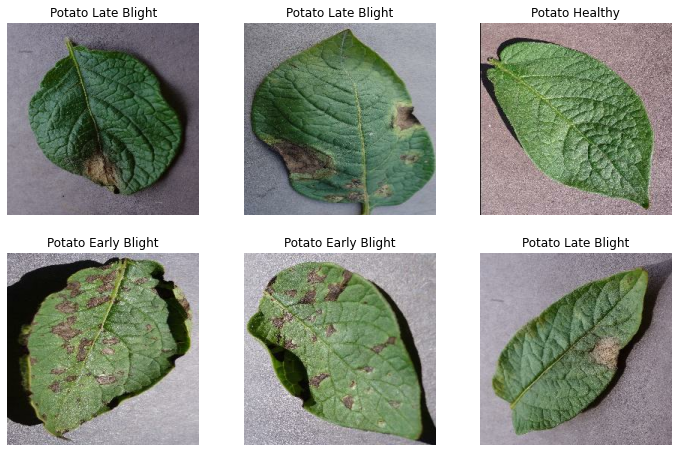

In [6]:
#let's now try to visualize our images with their label
plt.figure(figsize=(12,12))
for image_batch, label_batch in training_set.take(1):
    for i in range(6):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(train_class_names[label_batch[i]])
        #plt.title(label_batch[i].numpy())
        
        
    print(image_batch[0].shape)

In [7]:
#let's writre a function dto split our data automatically
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1,val_split = 0.1, shuffle =True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 1200)
        
    train_size = int(train_split*ds_size)
    val_size = int(ds_size*val_split)
    
    train_data = ds.take(train_size)
    val_data = ds.skip(train_size).take(val_size)
    test_data = ds.skip(train_size).skip(val_size)
    return train_data, test_data, val_data 

In [8]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(training_set)
len(train_ds), len(test_ds), len(val_ds)

(224, 28, 28)

In [9]:
#This is made to optimize the moderl performance so that tthe model trains better because of the pipeline stuff...
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
#Now let's scale our images AKA data normalization
#And also the resize layer will take care of resizing the images submitted the model during training even if they are not of size 256x256
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [11]:
#Here we will perform the data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model_potato= models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
  
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_potato.build(input_shape=input_shape)

In [13]:
model_potato.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model_potato.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS,
)

Epoch 1/30
224/224 [==============================] - 66s 214ms/step - loss: 1.0512 - accuracy: 0.4957 - val_loss: 0.5366 - val_accuracy: 0.7388
Epoch 2/30
224/224 [==============================] - 35s 156ms/step - loss: 0.5879 - accuracy: 0.7134 - val_loss: 0.4166 - val_accuracy: 0.7600
Epoch 3/30
224/224 [==============================] - 32s 142ms/step - loss: 0.4412 - accuracy: 0.7621 - val_loss: 0.4187 - val_accuracy: 0.7511
Epoch 4/30
224/224 [==============================] - 32s 142ms/step - loss: 0.4119 - accuracy: 0.7713 - val_loss: 0.3733 - val_accuracy: 0.7734
Epoch 5/30
224/224 [==============================] - 32s 143ms/step - loss: 0.3870 - accuracy: 0.7831 - val_loss: 0.3245 - val_accuracy: 0.8181
Epoch 6/30
224/224 [==============================] - 32s 142ms/step - loss: 0.3700 - accuracy: 0.7981 - val_loss: 0.3532 - val_accuracy: 0.8002
Epoch 7/30
224/224 [==============================] - 32s 142ms/step - loss: 0.3560 - accuracy: 0.8082 - val_loss: 0.3111 - val_ac

In [15]:
#import data into tensorflow dataset object
test_set=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Potatoes/test",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 847 files belonging to 4 classes.


In [16]:
test_class_names = test_set.class_names
test_class_names

['Potato Early Blight',
 'Potato Healthy',
 'Potato Infestans',
 'Potato Late Blight']

first image to predict
actual label: Potato Early Blight
predicted label: Potato Early Blight


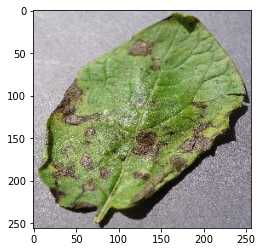

In [17]:
#Run prediction on a sample image
for images_batch, test_labels_batch in test_set.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = test_labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",train_class_names[first_label])
    
    batch_prediction = model_potato.predict(images_batch)
    print("predicted label:",test_class_names[np.argmax(batch_prediction[0])])

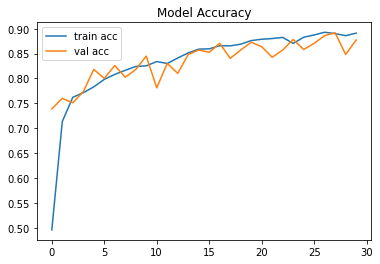

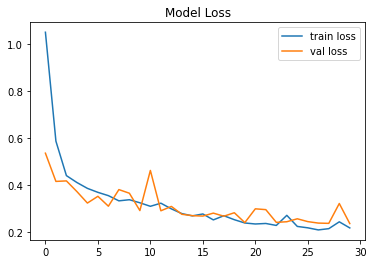

In [18]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()
,
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model_potato.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
confusion_matrix(predicted_labels, correct_labels)

array([[206,   0,   0,   1],
       [  1, 255,   0,   2],
       [  0,   0, 195,  71],
       [  0,   0,  22, 143]], dtype=int64)

In [20]:
train_class_names

['Potato Early Blight',
 'Potato Healthy',
 'Potato Infestans',
 'Potato Late Blight']

In [21]:
from sklearn.metrics import classification_report
y_true = correct_labels
y_pred = predicted_labels
target_names = train_class_names
print(classification_report(y_true, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Potato Early Blight       1.00      1.00      1.00       207
     Potato Healthy       0.99      1.00      0.99       255
   Potato Infestans       0.73      0.90      0.81       217
 Potato Late Blight       0.87      0.66      0.75       217

           accuracy                           0.89       896
          macro avg       0.90      0.89      0.89       896
       weighted avg       0.90      0.89      0.89       896



In [22]:
#The Model eveluation we'll be used to check if the obtained accuracies are the same in both the matrix and the evaluation
model_potato.evaluate(test_ds)

28/28 [==============================] - 2s 62ms/step - loss: 0.2232 - accuracy: 0.8917


[0.22322683036327362, 0.8917410969734192]

In [23]:
#This is our Confusion Matrix for the potato model

In [24]:
# import libraries
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.utils.multiclass import unique_labels
import time
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.callbacks import TensorBoard

In [25]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          text_size=14,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(11,11))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    size=text_size,
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

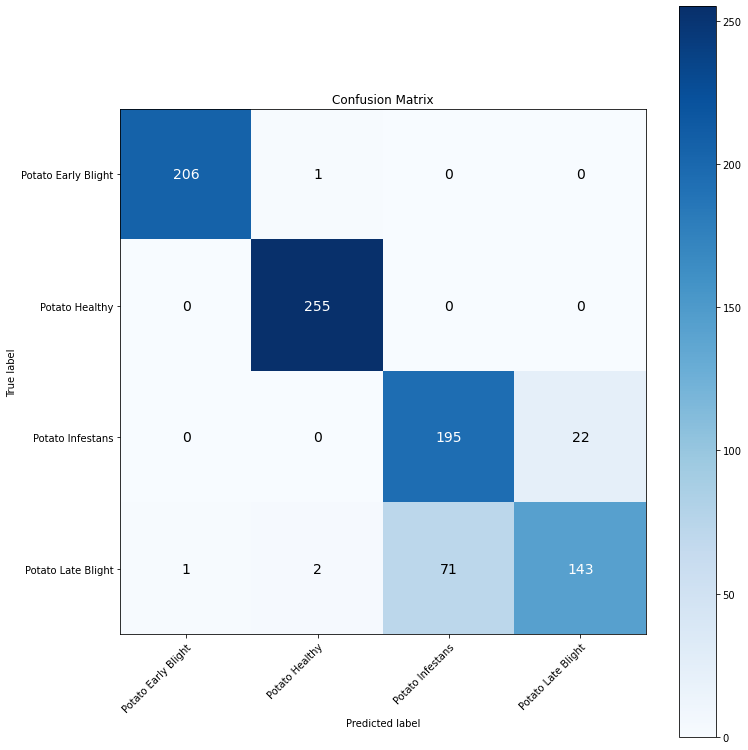

In [26]:
plot_confusion_matrix(correct_labels, predicted_labels, train_class_names, title="Confusion Matrix")

In [27]:
model_potato.save("C:/Users/q/Downloads/All_Data/saved_models/PotatoModel.h5")

In [28]:
model_test = models.load_model('C:/Users/q/Downloads/All_Data/saved_models/PotatoModel.h5')

In [29]:
model_test.evaluate(test_ds)

28/28 [==============================] - 2s 61ms/step - loss: 0.2232 - accuracy: 0.8917


[0.2232268750667572, 0.8917410969734192]

first image to predict
actual label: Potato Late Blight
predicted label: Potato Late Blight


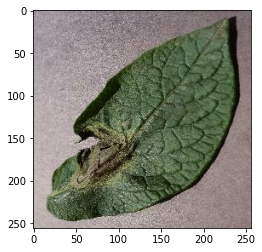

In [30]:
#Run prediction on a sample image
for images_batch, test_labels_batch in test_set.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = test_labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",train_class_names[first_label])
    
    batch_prediction = model_test.predict(images_batch)
    print("predicted label:",test_class_names[np.argmax(batch_prediction[0])])